## About iPython Notebooks ##

iPython Notebooks are interactive coding environments embedded in a webpage. You will be using iPython notebooks in this class. Make sure you fill in any place that says `# BEGIN SOLUTION #END CODE HERE` searching for the missing parts (usually denoted with `...`). After writing your code, you can run the cell by either pressing "SHIFT"+"ENTER" or by clicking on "Run" (denoted by a play symbol). Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). 

 **What you need to remember:**

- Run your cells using SHIFT+ENTER (or "Run cell")
- Write code in the designated areas using Python 3 only
- Do not modify the code outside of the designated areas
- In some cases you will also need to explain the results. There will also be designated areas for that. 

Fill in your **NAME** and **AEM** below:

In [68]:
NAME = "Vasiliki Gouma"
AEM = "9755"

---

# Assignment 2 - Decision Trees #

Welcome to your second assignment. This exercise gives you an introduction to [scikit-learn](https://scikit-learn.org/stable/). A simple but efficient machine learning library in Python. It also gives you a wide understanding on how decision trees work. 

After this assignment you will:
- Be able to use the scikit-learn library and train your own model from scratch.
- Be able to train and understand decision trees.

In [69]:
# Always run this cell
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# USE THIS RANDOM VARIABLE TO PRODUCE THE SAME RESULTS
RANDOM_VARIABLE = 42

## 1. Scikit-Learn and Decision Trees ##

You are going to use the scikit-learn library to train a model for detecting breast cancer using the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) by training a model using [decision trees](https://scikit-learn.org/stable/modules/tree.html).

**1.1** Load the breast cancer dataset using the scikit learn library. From variable *cdata*, you should export the *X* and *y*, from the *data* and *target* variables of the variable *cdata*, respectively, and the feature names and target names from the variables *feature_names* and *target_names*, respectively. Convert the latter two (feature names and target names) into lists. Thus, X and y should be numpy arrays, and feature_names and target_names should be lists. Then split the dataset into train and test set using the appropriate function. Use 33% of the dataset as the test set. Define as X the attributes and as y the target values. Do not forget to set the random_state parameter as the *RANDOM_VARIABLE* defined above. Use this variable for all the random_state parameters in this assignment.

In [70]:
cdata = load_breast_cancer(as_frame=True)

# BEGIN SOLUTION
# ----------------------Above we have as_frame=true , so X,y will  be a pandas and series dataframe instead on numpy arrays as requested.(If it was as_frame=false they would be numpy arrays...)
#So I load again the database (as i can't change the code above) without parameters, because the defualt is as_frame-false. This way X,y will be numpy arrays.
cdata = load_breast_cancer()
X = cdata.data
y = cdata.target
feature_names = cdata.feature_names
target_names = cdata.target_names
#convert feature_names and target_names into lists
feature_names=list(feature_names)
target_names=list(target_names)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=RANDOM_VARIABLE)

# END CODE HERE

In [71]:
print("Type of X: {}".format(type(X)))
print("Type of y: {}".format(type(y)))
print("Type of feature_names: {}".format(type(feature_names)))
print("Type of target_names: {}".format(type(target_names)))
print("Size of train set: {}".format(len(y_train)))
print("Size of test set: {}".format(len(y_test)))
print("Unique classes: {}".format(len(set(y_test))))

Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>
Type of feature_names: <class 'list'>
Type of target_names: <class 'list'>
Size of train set: 381
Size of test set: 188
Unique classes: 2


**Expected output**:  

```
Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>
Type of feature_names: <class 'list'>
Type of target_names: <class 'list'>
Size of train set: 381
Size of test set: 188
Unique classes: 2
```



**1.2** Train two DecisionTree classifiers and report the F1 score. Use the information gain for the one classifier and the Gini impurity for the other, set the *max_depth* to 3, and do not forget to use the *RANDOM_VARIABLE*, as it is crucial for the following part.

In [72]:
# BEGIN SOLUTION
classifier_gini = DecisionTreeClassifier(max_depth=3,random_state=RANDOM_VARIABLE)
classifier_igain = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=RANDOM_VARIABLE)

# Train the model
# ...
classifier_gini.fit(X_train,y_train)
classifier_igain.fit(X_train,y_train)


# Perform predictions
prediction_gini = classifier_gini.predict(X_test)
prediction_igain = classifier_igain.predict(X_test)

# Evaluate using f1_score
f_measure_gini = f1_score(y_test,prediction_gini)

f_measure_igain = f1_score(y_test,prediction_igain)

# END CODE HERE

In [73]:
print("F-Measure Gini: {}".format(f_measure_gini))
print("F-Measure Information Gain: {}".format(f_measure_igain))

F-Measure Gini: 0.9663865546218487
F-Measure Information Gain: 0.979591836734694


**Expected output**:

```
F-Measure Gini: 0.9663865546218487
F-Measure Information Gain: 0.979591836734694
```

**1.3** In this part, you are going to explore one of the trained decision trees visually. We will use the *classifier_igain* and the function *export_graphviz* to plot the decision tree. You should fill in the missing parts of the functions parameters, which correspond to the decision tree model, the feature names and the target names.


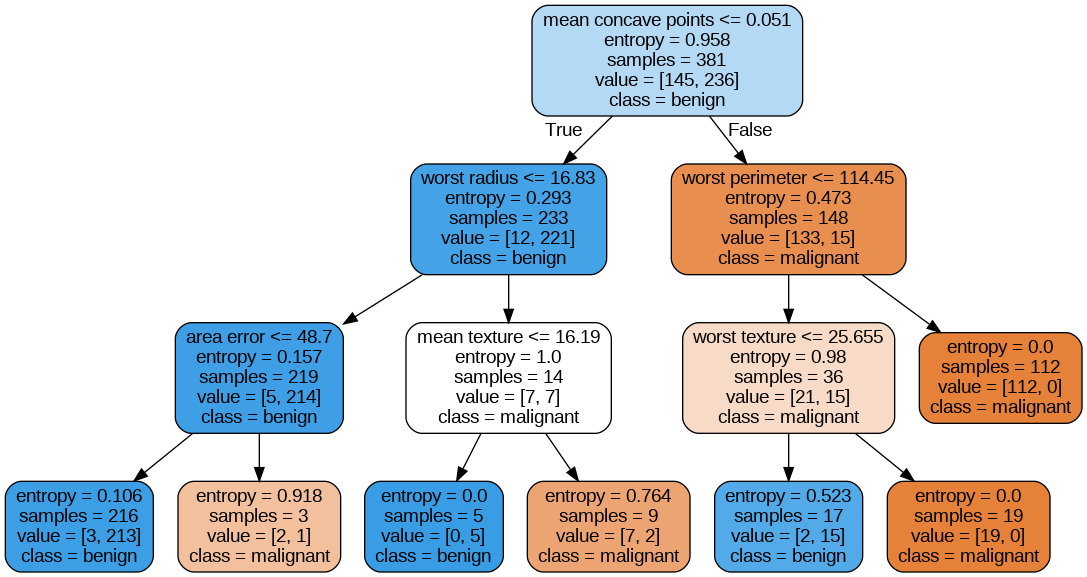

In [74]:
# Let's see how our tree looks
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call

# BEGIN SOLUTION
export_graphviz(
        classifier_igain,
        feature_names=feature_names,
        class_names=target_names,
        out_file="dtree.dot", 
        rounded=True,
        filled=True
    )
# END CODE HERE

call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=96'])
Image(filename = 'dtree.png')

**1.4** Now, we will examine two random instances (7th and 136th). Thus, we are presenting the decision tree's predictions for these instances, and the ground truth values. Moreover, for each instance, we print the feature values. However, as we can see from the plot above, only 6 features out of the 30 are being used by the tree. Thus, in order to print less information, we will use the *feature_importances_* variable of our tree to check which features has 0 importance to skip them.

In [75]:
instance_a = 7
instance_b = 136
for instance in [instance_a, instance_b]:
  print(str(instance)+ 'th instance a was classified as: ' +target_names[prediction_igain[instance]] +' while the ground truth was: ' + target_names[y_test[instance]])
  # BEGIN SOLUTION
  for idf, feature_name in enumerate(feature_names):
    if classifier_igain.feature_importances_[idf] != 0:
      print('\t'+feature_name+": "+str(X_test[instance][idf]))
  # END CODE HERE
  print('\n')

7th instance a was classified as: malignant while the ground truth was: malignant
	mean texture: 15.05
	mean concave points: 0.07953
	area error: 61.1
	worst radius: 20.01
	worst texture: 19.52
	worst perimeter: 134.9


136th instance a was classified as: malignant while the ground truth was: benign
	mean texture: 18.89
	mean concave points: 0.05381
	area error: 19.29
	worst radius: 14.8
	worst texture: 27.2
	worst perimeter: 97.33




**Expected output**:

```
7th instance a was classified as: malignant while the ground truth was: malignant
	mean texture: 15.05
	mean concave points: 0.07953
	area error: 61.1
	worst radius: 20.01
	worst texture: 19.52
	worst perimeter: 134.9


136th instance a was classified as: malignant while the ground truth was: benign
	mean texture: 18.89
	mean concave points: 0.05381
	area error: 19.29
	worst radius: 14.8
	worst texture: 27.2
	worst perimeter: 97.33
```



**1.6** Based on the aforementioned information, and the plotted decision tree, identify one feature value that if changed in each instance, the predicted class will change as well. Specifically, you should find a feature value change that will be small. Answer in the following cell, either with code, or/and writing a small paragraph explaining the feature, the change and why the decision will change.

In [76]:
# BEGIN SOLUTION
...
# END CODE HERE

or/and

YOUR ANSWER HERE

On the top of the plotted tree(tree length=0) the feature that based in its value we devide the tree is mean concave points. This feature's value affects every feature of the tree(its in the top of the tree), so if we change its value in every instance we can change the predicted class as well.

**1.7** Train multiple classifiers by modifying the max_depth within the range from 1 to 8 and save the f1 scores to the corresponding list of the *fscores* dictionary (one list for training set and one for test set). Before appending the scores to the corresponding list, multiply them by 100, and round the values to 2 decimals.

In [77]:
# BEGIN SOLUTION
depth = [1,2,3,4,5,6,7,8] 
fscores = {}
fscores['test']=  []
fscores['train']= []

for i in range(0,depth[6],1):
  tc=DecisionTreeClassifier(max_depth=depth[i],random_state=RANDOM_VARIABLE)
  tc.fit(X_train,y_train)
  fscore_test=f1_score(y_test,tc.predict(X_test))*100
  fscore_train=f1_score(y_train,tc.predict(X_train))*100
  fscore_test=round(fscore_test,2)
  fscore_train=round(fscore_train,2)
  fscores['test'].append(fscore_test) 
  fscores['train'].append(fscore_train) 


# END CODE HERE

In [78]:
print("Fscores Train: {}".format(fscores['train']))
print("Fscores Test:  {}".format(fscores['test']))

Fscores Train: [94.24, 95.46, 97.65, 99.15, 99.37, 99.58, 100.0]
Fscores Test:  [91.14, 93.97, 96.64, 94.12, 95.4, 95.04, 93.72]


**Expected output**:  
```
Fscores Train: [94.24, 95.46, 97.65, 99.15, 99.37, 99.58, 100.0]
Fscores Test:  [91.14, 93.97, 96.64, 94.12, 95.4, 95.04, 93.72]
```

**1.8** Compare the results from the train set with the results from the test set. What do you notice? How are you going to choose the max_depth of your model?

YOUR ANSWER HERE

By comparing the results from the train and test set we can see that the difference bettween the 1st elements of the two lists is 94.24-91.14=3.1. This difference is reduced in the 2nd ,3rd elements of the lists. The minimal difference is between the third elements which is 97.65-96.64=1.01. After the 3rd elements the difference is increased as the values on the Fscores Train list are increased and the values on the Fscores Test list are reduced. I am going to choose the max_depth based on where I have the minimal difference between the test and train set results. In this case the minimal difference is bettween the 3rd elements of the lists which according to the implementation above is when we have max_lenght=2. So I would choose max lenght=2.

## 2.0 Pipelines ##

In this part of the exercise you are going to build a pipeline from scratch for a classification problem. Load the **income.csv** file and train a DecisionTree model that will predict the *income* variable. This dataset is a modification of the original Adult Income dataset found [here](http://archive.ics.uci.edu/ml/datasets/Adult). Report the f1-score and accuracy score of the test set found in **income_test.csv**. Your pipeline should be able to handle missing values and categorical features (scikit-learn's decision trees do not handle categorical values). You can preprocess the dataset as you like in order to achieve higher scores.  

**2.1** Load the train and test set variables from the files **income.csv** and **income_test.csv**

In [79]:
# BEGIN SOLUTION
train_set = pd.read_csv('income.csv')
y_train = train_set['income']
X_train=train_set[['age', 'fnlwgt', 'education_num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex']]

test_set = pd.read_csv('income_test.csv')
y_test = test_set['income']
X_test=test_set[['age', 'fnlwgt', 'education_num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex']]
#--------
print("X_train: \n",X_train)
# End CODE HERE

X_train: 
        age  fnlwgt  education_num  capital-gain  capital-loss  hours-per-week  \
0       39   77516             13          2174             0              40   
1       50   83311             13             0             0              13   
2       38  215646              9             0             0              40   
3       53  234721              7             0             0              40   
4       28  338409             13             0             0              40   
...    ...     ...            ...           ...           ...             ...   
32556   27  257302             12             0             0              38   
32557   40  154374              9             0             0              40   
32558   58  151910              9             0             0              40   
32559   22  201490              9             0             0              20   
32560   52  287927              9         15024             0              40   

              wo

**2.2** Check if there are any features with missing values in the data and report them. Check and report the numerical and categorical data, as well.

In [80]:
# BEGIN SOLUTION

print("----------Missing values in train_set :------------")
print(train_set.isnull())   #True if the value is missing , false if there isn't
print(train_set.isnull().sum())   #number of missing values
print("\n-------------Missing values in test set-------------")
print(test_set.isnull())  #True if the value is missing , false if there isn't
print(test_set.isnull().sum())  #number of missing values

#About numerical and categorical data

#data types in train_set
print("\n-----data types in train_set-----")
print(train_set.dtypes.value_counts() )
#data types in test_set
print("\n-----data types in test_set-----")
print(test_set.dtypes.value_counts() )

#find and separate categorical and numerical data
#We want to find the columns that have numerical data and the columns that have categorical data
#The two sets (train_test and test_set) have the same columns, so we don't have to do the below procedure twice for both sets!

print(train_set)
num_vars=train_set.columns[train_set.dtypes!='object']
categ_vars=train_set.columns[train_set.dtypes=='object']
print("\nColumns with numerical data :",num_vars)
print("\nColumns with categorical data :",categ_vars)
# End CODE HERE

----------Missing values in train_set :------------
         age  workclass  fnlwgt  education  education_num  marital-status  \
0      False      False   False      False          False           False   
1      False      False   False      False          False           False   
2      False      False   False      False          False           False   
3      False      False   False      False          False           False   
4      False      False   False      False          False           False   
...      ...        ...     ...        ...            ...             ...   
32556  False      False   False      False          False           False   
32557  False      False   False      False          False           False   
32558  False      False   False      False          False           False   
32559  False      False   False      False          False           False   
32560  False      False   False      False          False           False   

       occupation  rela

YOUR ANSWER HERE

Based on the printed results above, we have true if the value is missing and false if it isn't. We can also see how many missing values are in each feature. More specifically at train_test we have at features: workclass :1836 missing values ,occupation:1843 missing values. At test_set we have we have no missing values. 

Also watching the printed results above, we can see we have 8 columns which are categorical data (object data type) and 6 columns which are numerical data (int data type).The columns with categorical data are : 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'income'. The columns with numerical data are : 'age', 'fnlwgt', 'education_num', 'capital-gain', 'capital-loss',
       'hours-per-week'.

**2.3** Create your pipeline. An acceptable pipeline, should include both numerical and categorical handling.

In [81]:
# BEGIN SOLUTION
numeric_features=['age', 'fnlwgt', 'education_num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

numeric_transformer = Pipeline( steps=[("imputer", SimpleImputer(strategy="mean"))] )
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer( transformers=[ ("num", numeric_transformer, numeric_features),
        ("one_hot_cat", categorical_transformer, categorical_features),] )

# your pipeline!
clf = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier())])

# train the pipeline
clf.fit(X_train,y_train)
# End CODE HERE

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['age', 'fnlwgt',
                                                   'education_num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('one_hot_cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex'])])),
                ('classifier', DecisionTreeClassifier())])

**2.4** Evaluate the pipeline's performance, without tuning!

In [82]:
# BEGIN SOLUTION
# perform the prediction to the test set
y_predict=clf.predict(X_test)
# End CODE HERE
print("Model score Accuracy: %.3f" % accuracy_score(y_test,y_predict))
print("Model score F1 Weighted: %.3f" % f1_score(y_test,y_predict,average='weighted'))

Model score Accuracy: 0.807
Model score F1 Weighted: 0.808


**2.5** Perform a gooood grid search to find the best parameters for your pipeline. Both GridSearchCV and RandomizedSearchCV are acceptable

In [83]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "classifier__max_depth": [2, 5, 10],
    "classifier__criterion": ["gini","entropy"],
    "classifier__max_features": [0.25, 0.5, 0.75, None],
    "classifier__min_samples_leaf": [1,10,20,50],
}

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__max_features': None, 'classifier__min_samples_leaf': 10, 'preprocessor__num__imputer__strategy': 'mean'}


**2.6** Evaluate the best model's performance.

In [84]:
# BEGIN SOLUTION
final_model=grid_search.best_estimator_
final_model.fit(X_train,y_train)
# perform the prediction to the test set
y_predict=final_model.predict(X_test)
# End CODE HERE
print("Model score Accuracy: %.3f" % accuracy_score(y_test,y_predict))
print("Model score F1 Weighted: %.3f" % f1_score(y_test,y_predict,average='weighted'))

Model score Accuracy: 0.856
Model score F1 Weighted: 0.849


**2.7** Evaluate your model using at least three different evaluation metrics (note1: except accuracy and weighted f1 score, note2: do not use more than once a variation of f1).

In [85]:
# BEGIN SOLUTION
from sklearn.metrics import recall_score
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

#problem with data type..
metric1 = recall_score(y_test,y_predict,average='weighted')
metric2 = f1_score(y_test,y_predict,average='macro')
metric3 = precision_score(y_test,y_predict,average='weighted')
#END CODE HERE

In [86]:
print("Model score Metric 1: %.3f" % metric1)
print("Model score Metric 2: %.3f" % metric2)
print("Model score Metric 3: %.3f" % metric3)

Model score Metric 1: 0.856
Model score Metric 2: 0.788
Model score Metric 3: 0.850


**2.8** Describe the process you followed to achieve the results above. Your description should include, but is not limited to the following 
- How do you handle missing values and why
- How do you handle categorical variables and why
- Any further preprocessing steps
- How do you evaluate your model and how did you choose its parameters 
- Report any additional results and comments on your approach.

You should achieve at least 85% accuracy score and 84% f1 score.

YOUR ANSWER HERE

The handling of missing data is very important as many machine learning algorithms do not support missing values,also it can bias the results of the machine learning models or reduce the accuracy of the model.
We handle missing data differently, depending on whether they are numerical or categorical.We find which data are what, by using dtypes function (as it is implemented in the code above).(There are also comments next to the code ,for better understanding).Except from deleting rows and columns (if the missing data are too much),in numerical missing values we can impute the mean(or median or mode or do multiple imputation).In categorical data missing values can be solved by mode, multiple imputation, or in this case(see code above) by using the OneHotEncoder transformer.We also improve our data preprocessing by using column transformer and pipelines.
There are many methods to evaluate our model in sklearn.metrics such as accuracy,f1_score which are some of the most common(some others are mentioned above ,but in total are to many to list). These methods take the target feature from test and its prediction and tell you how good your prediction is ( and the model you used to make it).There is also a third parameter ,in our case we have used : average='weighted' to calculate the score by taking the mean of all per-class scores while considering each class’s support and average='macro' to calculate the (unweighted mean) of all the per-class scores.

**Bonus Question:** Did you like this assignment? Please provide your feedback.

YOUR ANSWER HERE

It was an interesting assignment, very helpfull to understand everything better.